In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv(r"C:\Users\anike\OneDrive\Desktop\mlcodesgit\ML_Codes\onlinefraudDetect\online_payment_fraud_data.csv")
df = df.drop(columns=["isFlaggedFraud"],axis=1).copy()

In [4]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0


In [5]:
df = df.drop(columns = ["nameOrig","nameDest"]).copy()

In [6]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df.type = le.fit_transform(df.type)

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier

In [8]:
x = df.drop(columns = "isFraud",axis=1).copy()
y = df.isFraud

In [9]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.33,random_state=42)

In [10]:
gbclf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=0)
gbclf.fit(xtrain,ytrain)

GradientBoostingClassifier(learning_rate=1.0, max_depth=1, random_state=0)

In [11]:
gbclf.score(xtest,ytest)

0.9987683749550523

In [12]:
#visualizations

In [13]:
y_gbclf_proba = gbclf.predict_proba(xtest)
y_gbclf_pred = np.where(y_gbclf_proba[:,1] > 0.5, 1, 0)

<Axes: title={'center': 'Confusion Matrix for GBCLF'}, xlabel='Predicted label', ylabel='True label'>

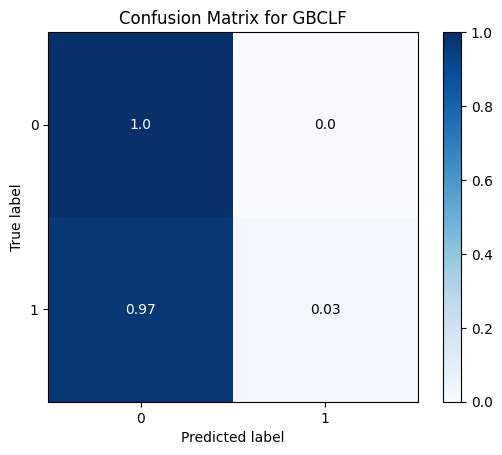

In [19]:
import scikitplot as skplt

skplt.metrics.plot_confusion_matrix(ytest, y_gbclf_pred, normalize=True, title = 'Confusion Matrix for GBCLF')


<Axes: title={'center': 'ROC Plot for GBCLF'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

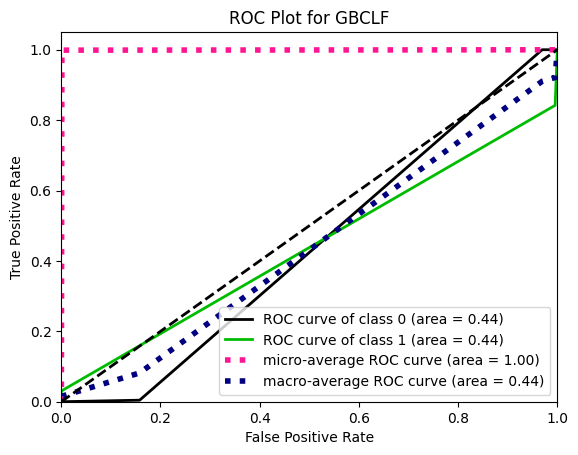

In [20]:
skplt.metrics.plot_roc(ytest, y_gbclf_proba, title = 'ROC Plot for GBCLF')

<Axes: title={'center': 'PR Curve for GBCLF'}, xlabel='Recall', ylabel='Precision'>

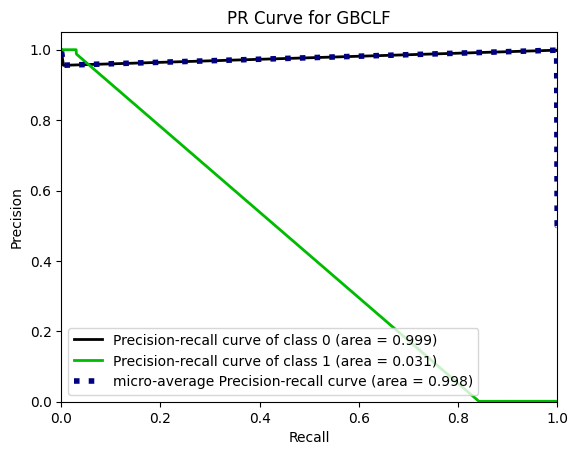

In [21]:
skplt.metrics.plot_precision_recall(ytest, y_gbclf_proba, title = 'PR Curve for GBCLF')

<Axes: title={'center': 'Cumulative Gains Chart for GBCLF'}, xlabel='Percentage of sample', ylabel='Gain'>

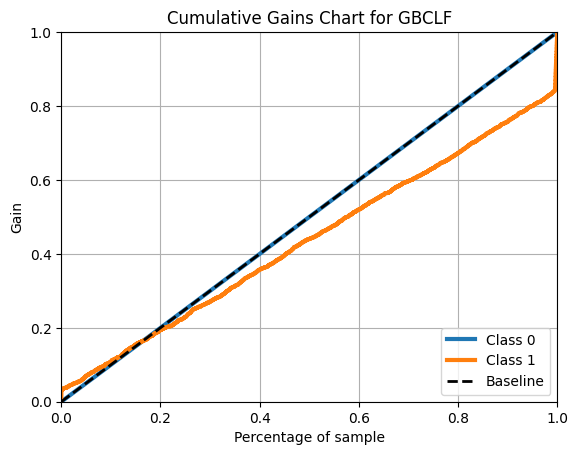

In [22]:
skplt.metrics.plot_cumulative_gain(ytest, y_gbclf_proba, title = 'Cumulative Gains Chart for GBCLF')

<Axes: title={'center': 'Lift Curve for GBCLF'}, xlabel='Percentage of sample', ylabel='Lift'>

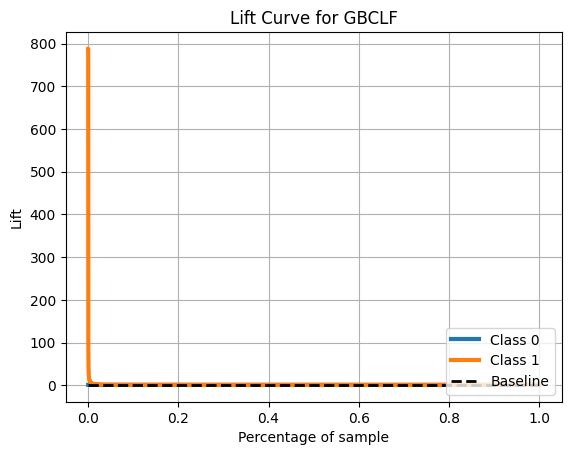

In [23]:
skplt.metrics.plot_lift_curve(ytest, y_gbclf_proba, title = 'Lift Curve for GBCLF')